In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import json
import requests
import os
import seaborn as sns

In [8]:
combined = pd.read_pickle('../node_and_degree_list.pkl')
combined.head

thresh = 1000
small = combined.loc[combined.followers_count < thresh]
small = small.loc[small.followers_count < thresh]

In [27]:
small.head()

,twitter_id,followers_count,following_count,label
24,4307623643,59,4,bot
36,844779426260791296,768,1,bot
83,837316817324556289,182,6,bot
137,913028718377005056,87,147,bot
175,790017240733278208,19,47,bot


In [10]:
# Compare each metric for each network
m = pd.read_pickle('feature_data/mentions.pkl')
l = pd.read_pickle('feature_data/likes.pkl')
f = pd.read_pickle('feature_data/follows.pkl')

In [47]:
plt_metrics = ['In Degree', 'Out Degree', 'Clustering Coefficient', 'PageRank', 
               'AM1 - In Degree', 'AM1 - Out Degree', 
              'AM2 - In Degree', 'AM2 - Out Degree']
metrics = m.columns[1:-1]
networks = ['mentions', 'likes', 'follows']
n = [m, l, f]
for net, d in zip(networks, n):
    for metric in metrics:
        d[metric] = d[metric].astype(float)


## Generate Figures

mentions
indeg
bot---
729.3717277486911
251.67067670323112
human---
728.1615384615385
267.6832769131024

outdeg
bot---
846.848167539267
684.5298063436977
human---
610.0038461538461
559.1969731779712

clustercoeff
bot---
0.004139668953675129
0.016153958332802906
human---
0.0041252485886754935
0.00705278282300849

pagerank
bot---
0.22003480521306912
0.05080737407358209
human---
0.2137687833948755
0.045898775481023606

indeg_A1
bot---
290.62681315530773
2779.3533074874467
human---
151.10225371746202
994.0049100909584

outdeg_A1
bot---
0.0
0.0
human---
0.0
0.0

indeg_A2
bot---
0.2949247956778702
0.17514790450039197
human---
0.3496806641239656
0.17681077742116247

outdeg_A2
bot---
0.0
0.0
human---
0.0
0.0

likes
indeg
bot---
365.62068965517244
389.61844098637096
human---
299.05882352941177
368.32914637766754

outdeg
bot---
413.51724137931035
546.5725426098309
human---
314.70588235294116
550.0405786359471

clustercoeff
bot---
0.0008387377880655418
0.001417910324807683
human---
0.005096995800

<ipython-input-111-09be693797ef>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 3))


indeg_A1
bot---
1.790632462635126
5.422995100303182
human---
6.861720017084767
36.129979130938366

outdeg_A1
bot---
2.152552836397742
7.023167444040901
human---
2.4893799728943398
5.403299698165988

indeg_A2
bot---
0.11812447766730746
0.14308630775155579
human---
0.10063984766933241
0.14387134148846611

outdeg_A2
bot---
0.15548084723389866
0.23556976454873826
human---
0.06572581478338316
0.1341409260786904



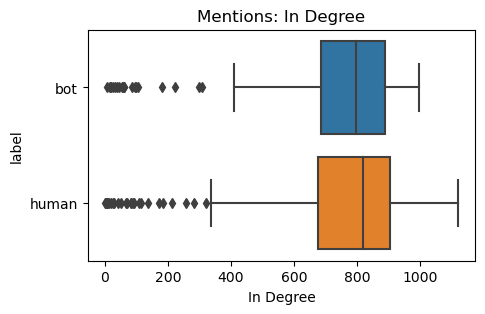

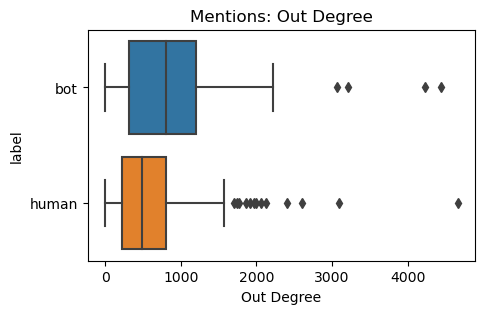

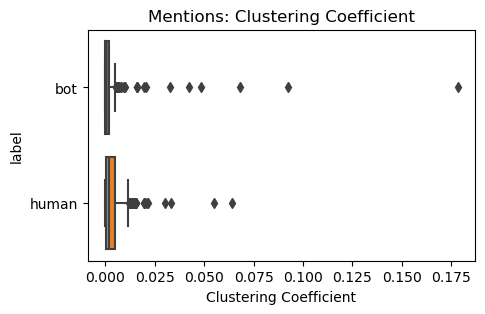

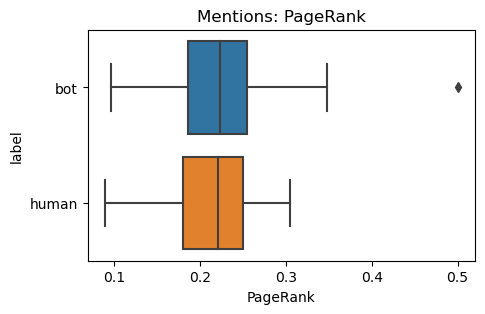

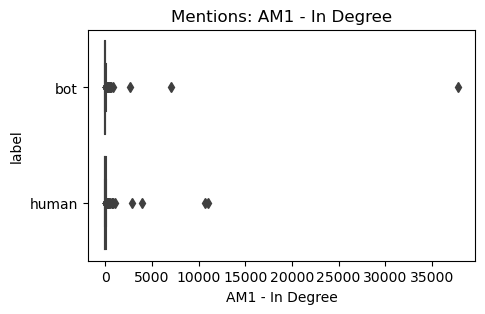

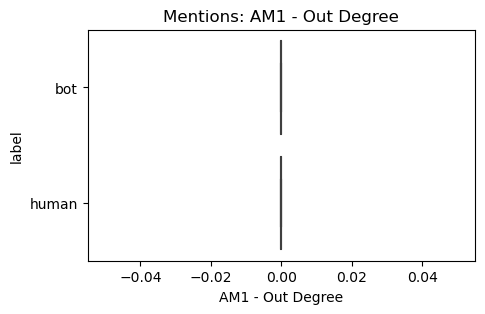

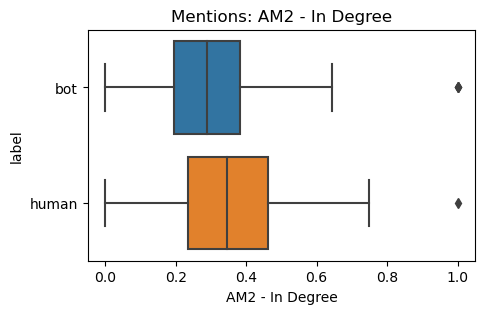

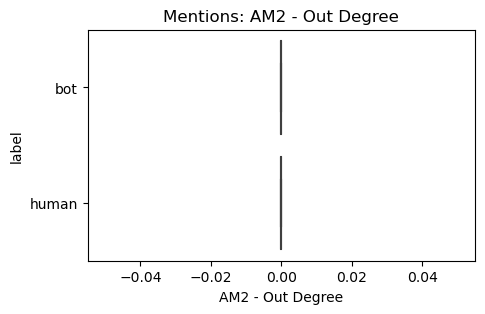

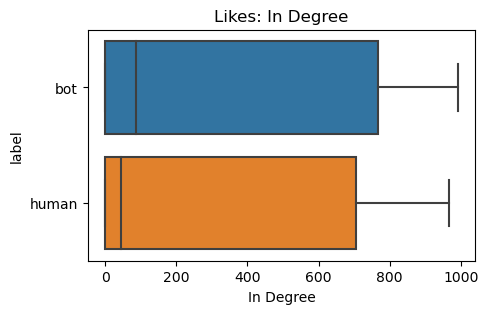

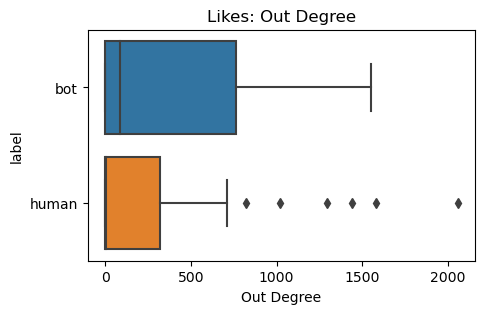

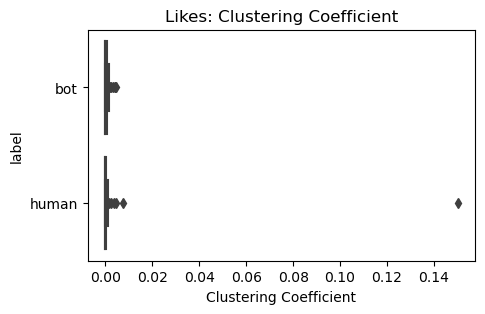

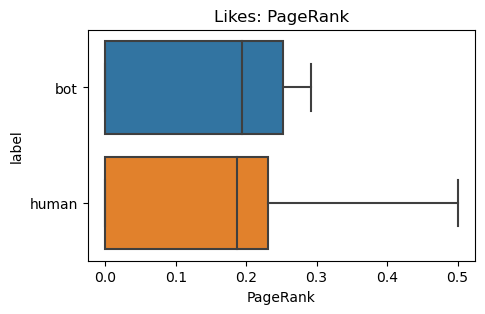

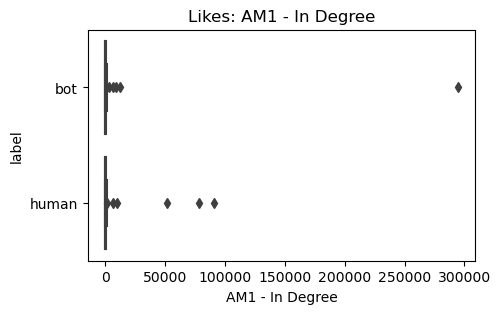

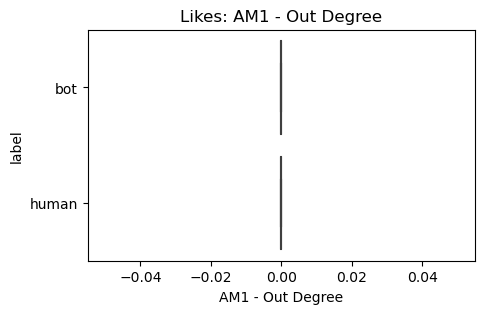

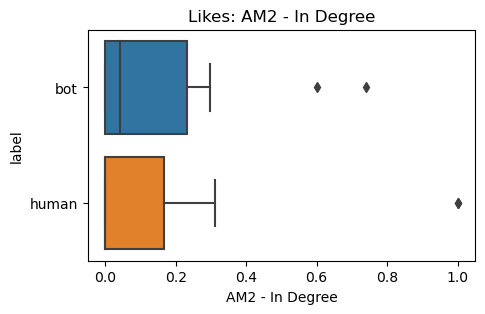

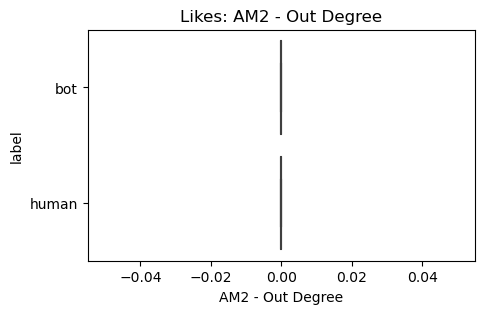

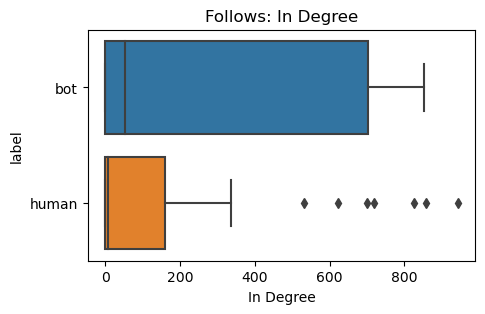

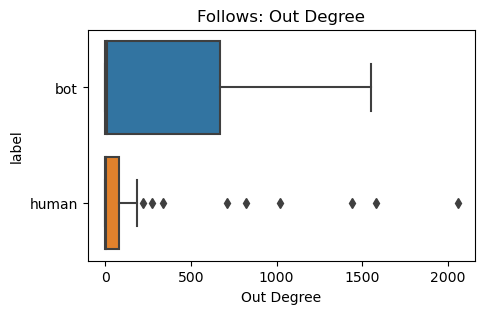

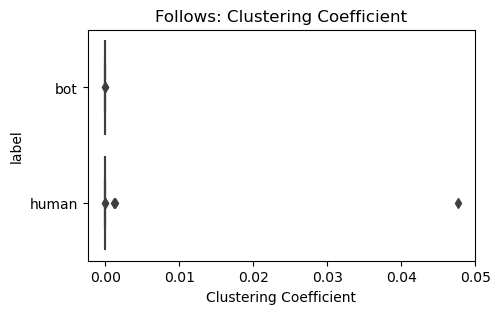

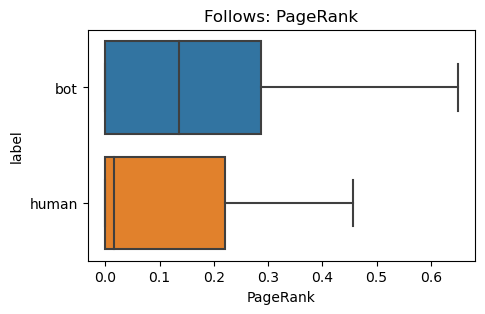

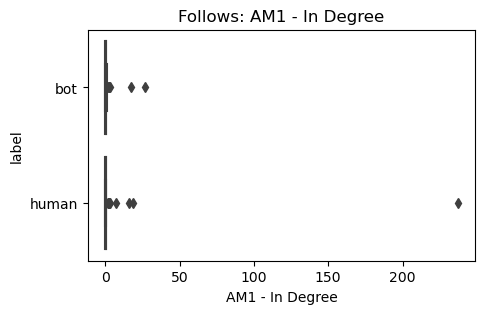

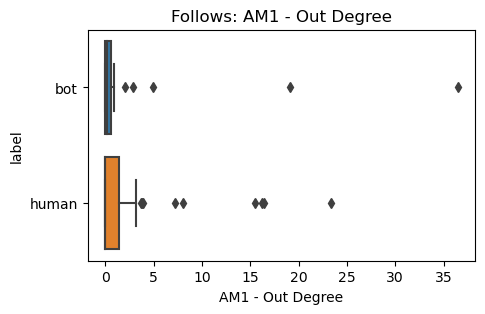

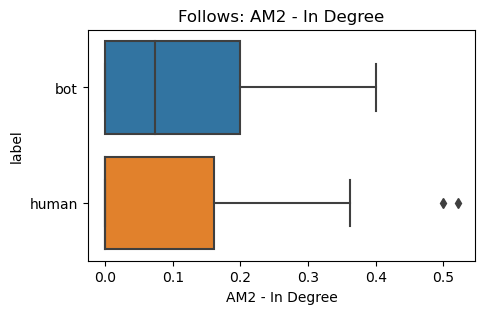

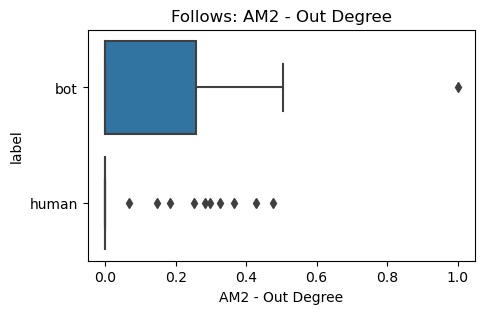

In [111]:
for net, d in zip(networks, n):
    print(net)
    for metric, name in zip(metrics,plt_metrics):
        plt.figure(figsize=(5, 3))
        t = d[metric]
        sns.boxplot(x=d[metric], y=d['label'])
        plt.xlabel(name)
        plt.title(net.capitalize() + ': ' + name)
        
        
        print(metric)
        print('bot---')
        print(d.loc[d.label == 'bot', metric].mean())
        print(d.loc[d.label == 'bot', metric].std())
        print('human---')
        print(d.loc[d.label == 'human', metric].mean())
        print(d.loc[d.label == 'human', metric].std())
        print()
        

In [ ]:
bins = [20, 20, 5]

In [ ]:
plt.figure(figsize=(6, 6));
sns.histplot(m, x=metric, hue='label', bins=5, multiple="stack", stat='probability');

In [116]:
m['indeg_A1'].describe()

count      451.000000
mean       210.191369
std       1958.321450
min          0.060742
25%          1.335528
50%          5.280513
75%         24.883860
max      37735.893939
Name: indeg_A1, dtype: float64

Text(0, 0.5, 'Probability Density')

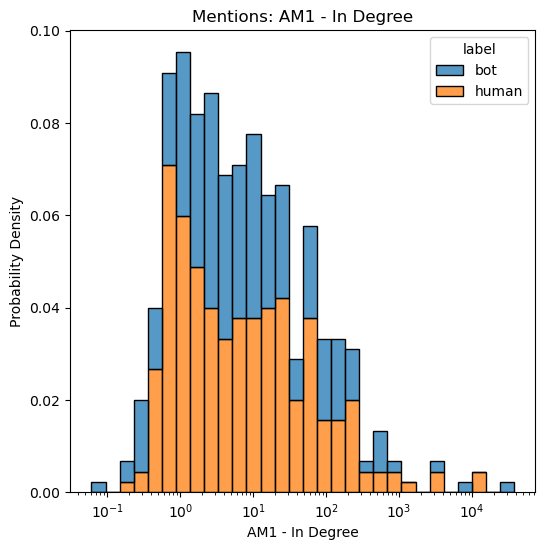

In [133]:
plt.figure(figsize=(6, 6))
sns.histplot(data=m, x='indeg_A1', hue='label', multiple='stack', 
             stat='probability', bins=30, log_scale=True)

plt.title('Mentions: AM1 - In Degree')
plt.xlabel('AM1 - In Degree')
plt.ylabel('Probability Density')

<ipython-input-95-872d3fa790d4>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 6));


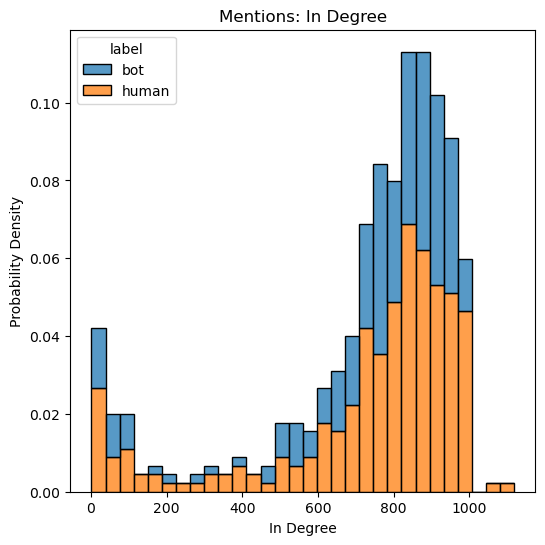

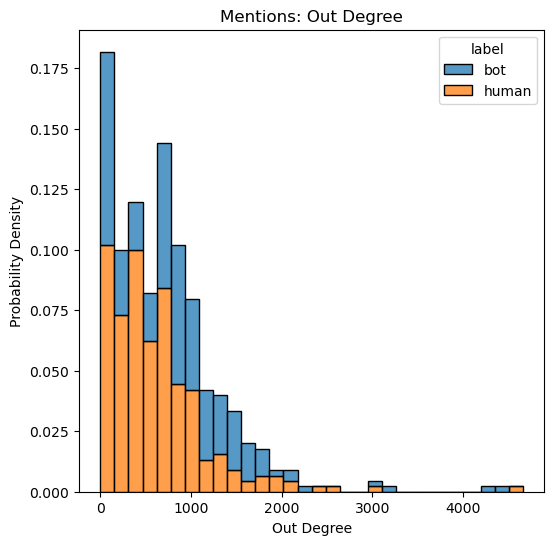

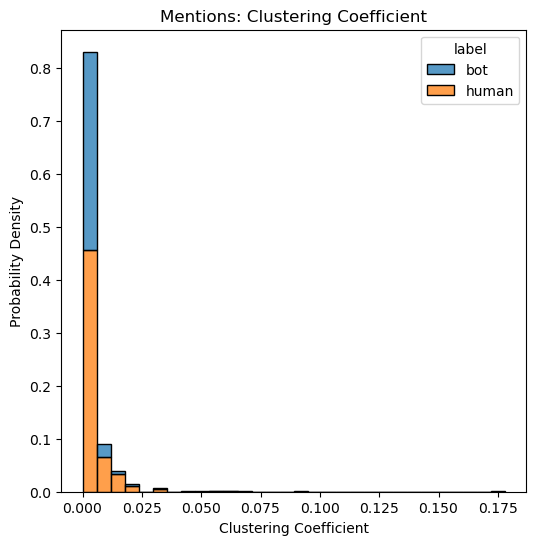

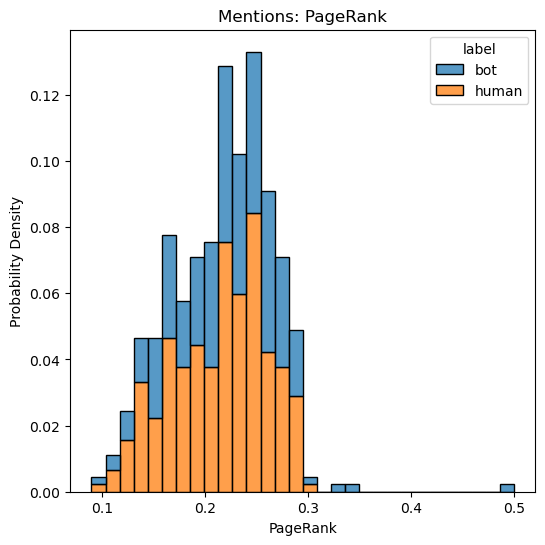

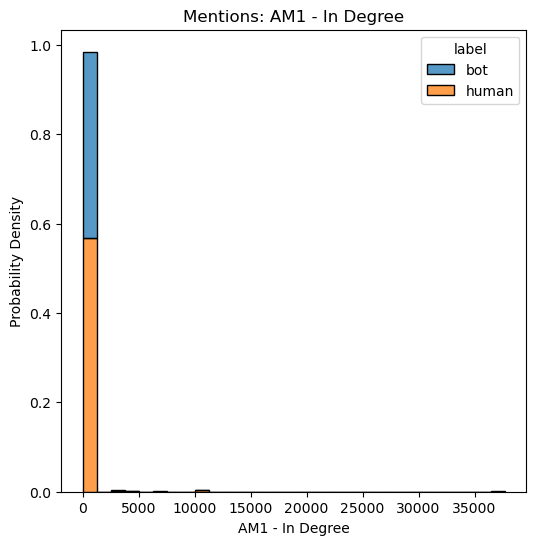

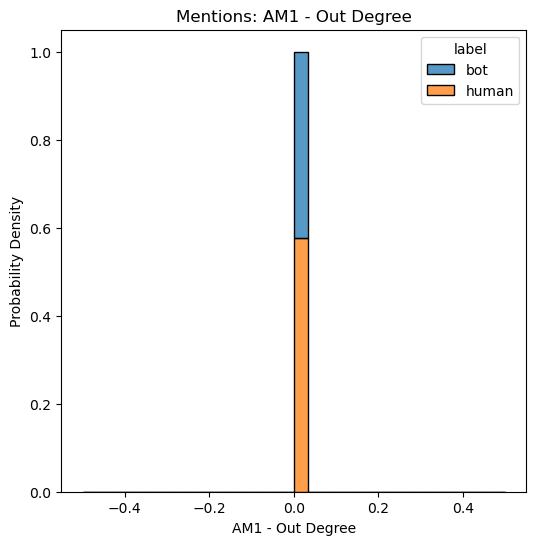

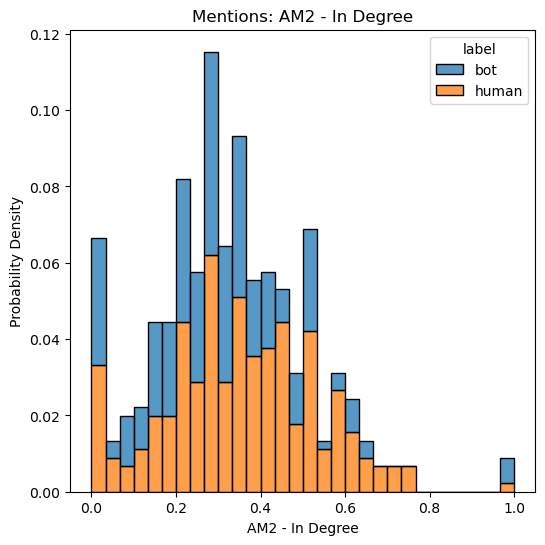

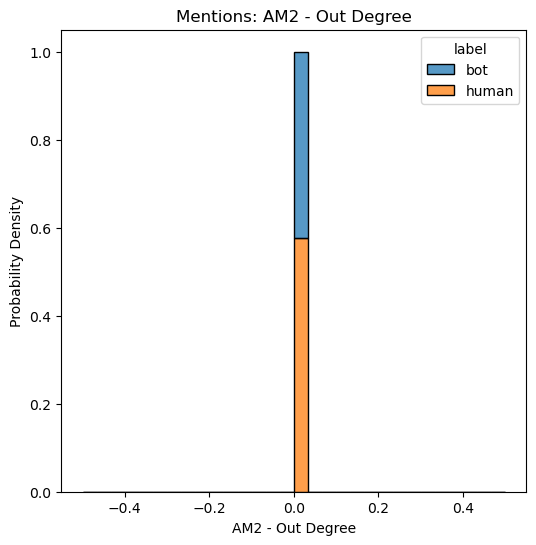

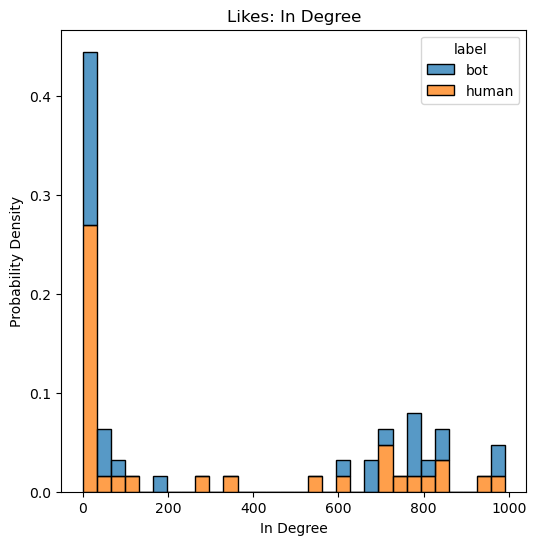

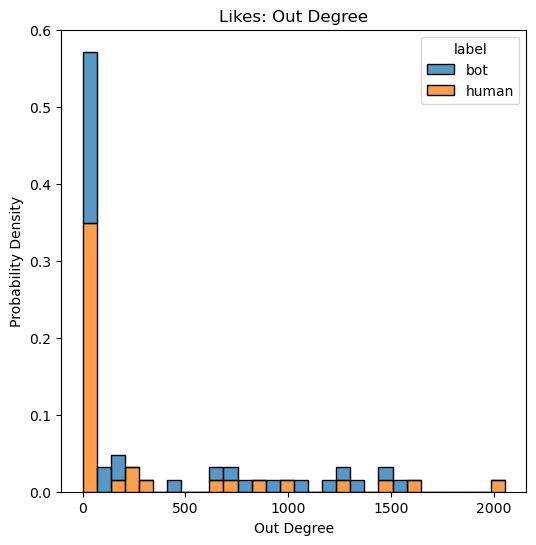

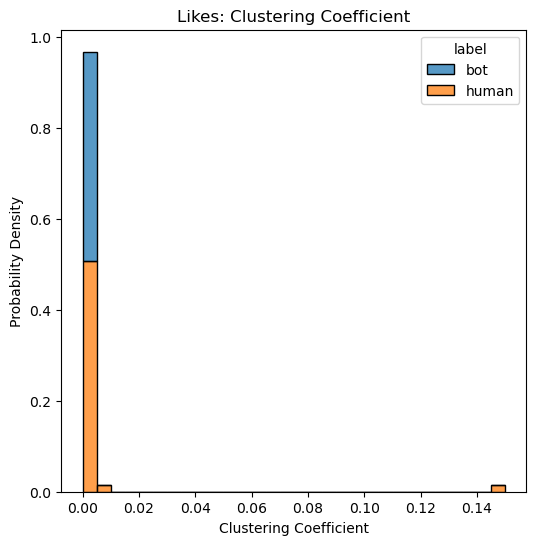

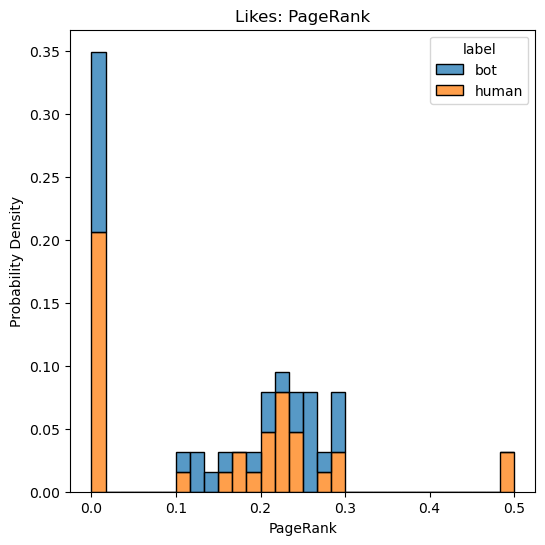

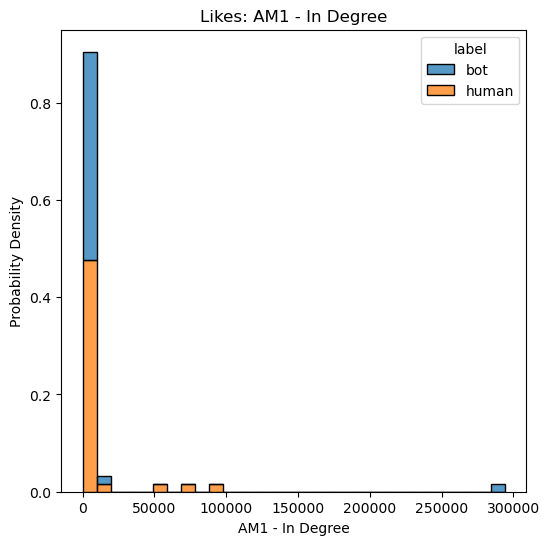

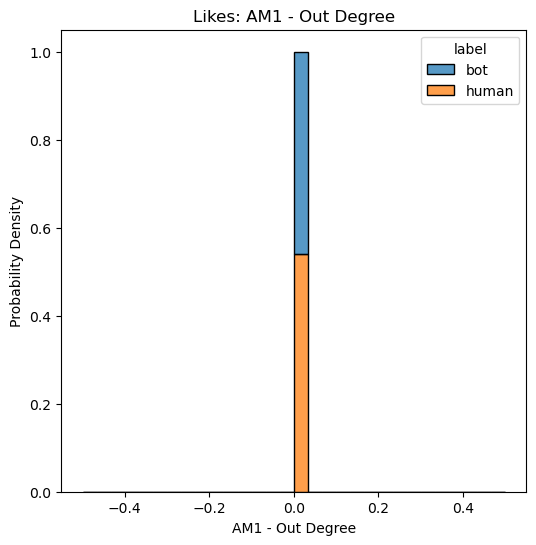

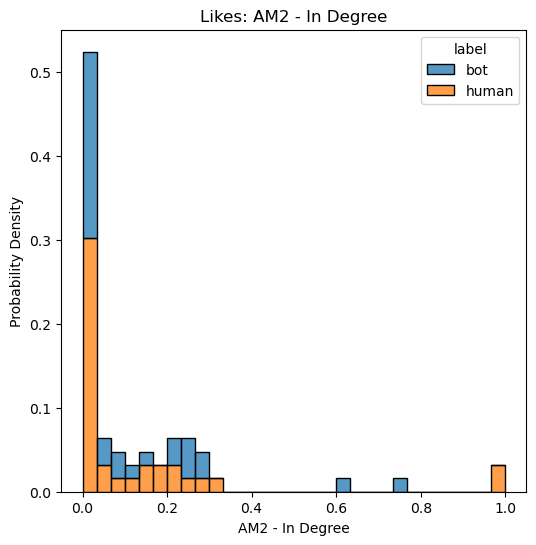

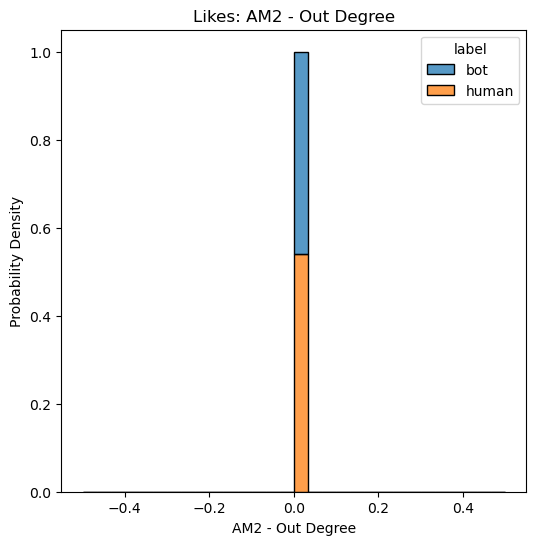

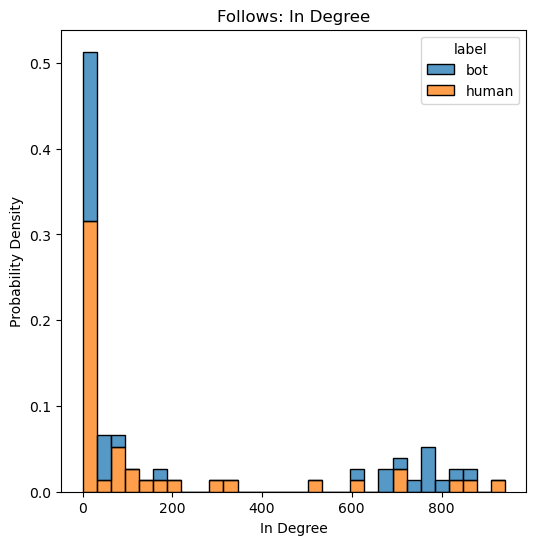

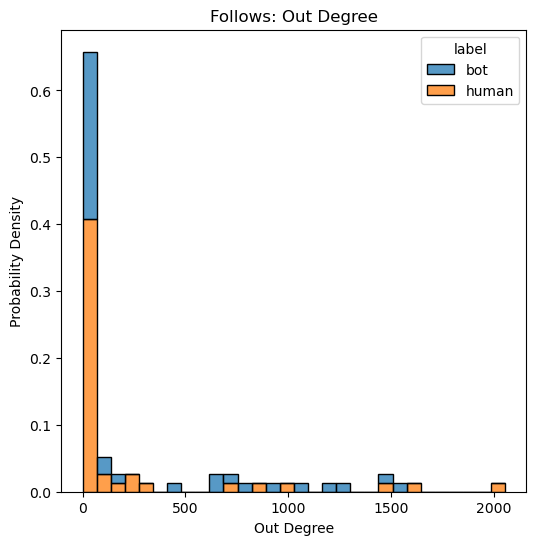

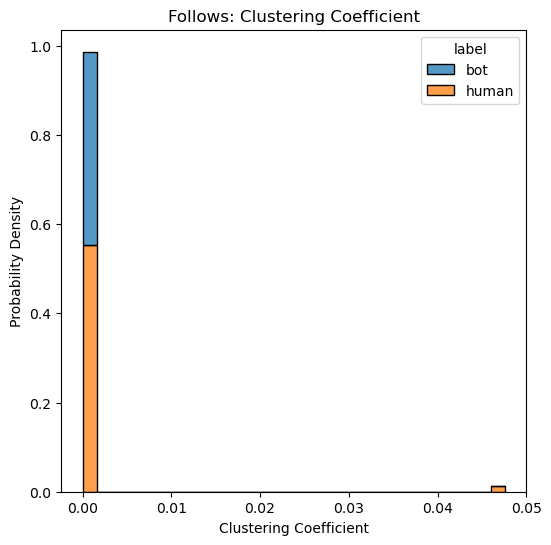

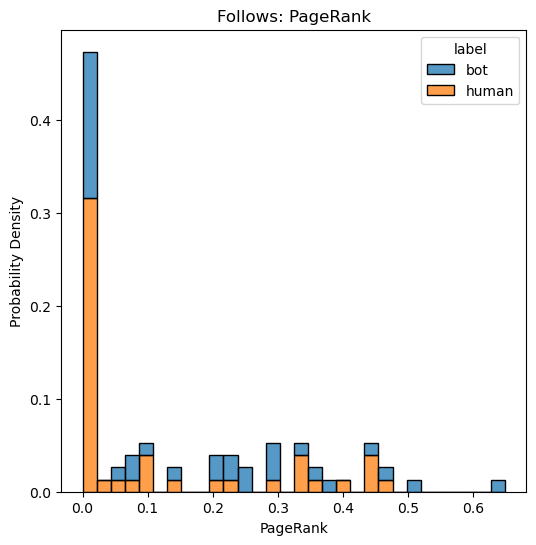

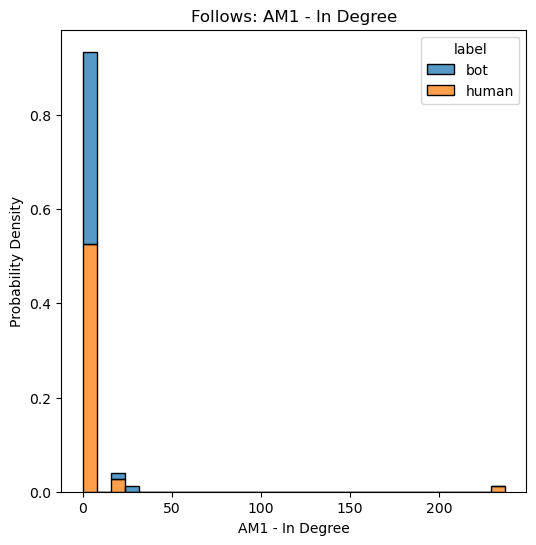

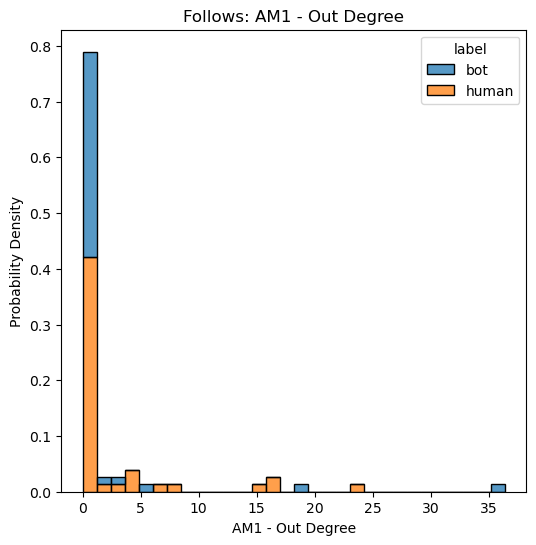

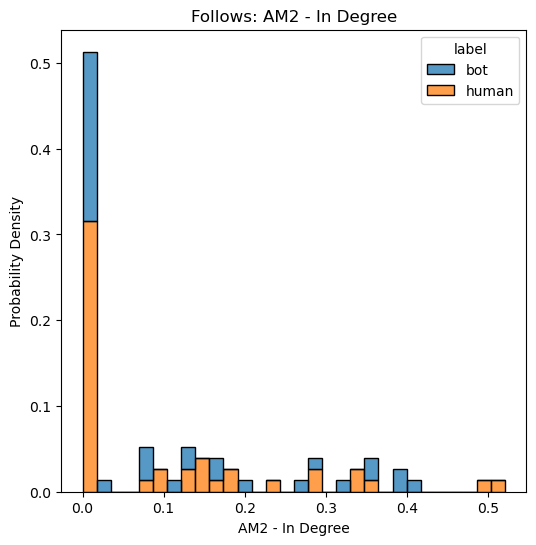

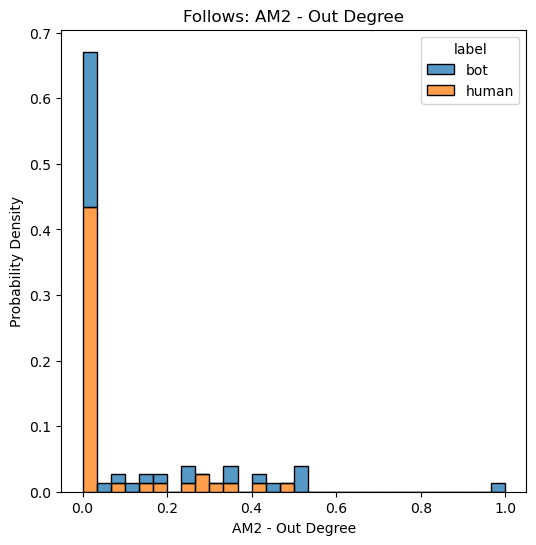

In [95]:
for net, d in zip(networks, n):
    for metric, name in zip(metrics,plt_metrics):
        plt.figure(figsize=(6, 6));
        sns.histplot(d, x=metric, hue='label', bins=30, multiple="stack", stat='probability');
        plt.title(net.capitalize() + ': ' + name)
        plt.xlabel(name)
        plt.ylabel('Probability Density')
        plt.savefig('figures/displot-' + net + '-' + metric)

## Scale the data and generate same plots

In [138]:
m.columns

Index(['twitter_id', 'indeg', 'outdeg', 'clustercoeff', 'pagerank', 'indeg_A1',
       'outdeg_A1', 'indeg_A2', 'outdeg_A2', 'label'],
      dtype='object')

In [151]:
import sklearn
from sklearn.preprocessing import StandardScaler
Xm = m[['indeg', 'outdeg', 'clustercoeff', 'pagerank', 'indeg_A1',
       'outdeg_A1', 'indeg_A2', 'outdeg_A2']]

scaler = StandardScaler()
scaler.fit(Xm)
print(scaler.mean_)
print(scaler.transform(Xm))

Xm = pd.DataFrame(scaler.transform(Xm))

[7.28674058e+02 7.10308204e+02 4.13135566e-03 2.16422464e-01
 2.10191369e+02 0.00000000e+00 3.26491372e-01 0.00000000e+00]
[[ 0.89970155  3.99922488 -0.33166505 ...  0.         -0.17784909
   0.        ]
 [-0.09857632  0.38187995 -0.35076272 ...  0.         -0.04673834
   0.        ]
 [-2.67874066 -1.11561446 -0.34713881 ...  0.         -1.40373456
   0.        ]
 ...
 [ 0.46967416 -0.41966354 -0.26527597 ...  0.          0.09707376
   0.        ]
 [ 0.02428865  2.05376206 -0.09259839 ...  0.          0.20892762
   0.        ]
 [ 0.97265262 -0.48365902  0.18341812 ...  0.          0.36455037
   0.        ]]


mentions
mentions
indeg
bot---
0.002678725463708878
0.9662971812854744
human---
-0.0019678329368012604
1.0277780444934486
P-VALUE for difference between means:
0.9612198834246503

mentions
outdeg
bot---
0.2184485385444961
1.0951704680454983
human---
-0.16047565716153345
0.8946520738316184
P-VALUE for difference between means:
6.318450203505818e-05

mentions
clustercoeff
bot---
0.0007063947436514616
1.372629593990889
human---
-0.0005189284462977491
0.5992870740042526
P-VALUE for difference between means:
0.9897697315862038

mentions
pagerank
bot---
0.07520941882497782
1.057816344995627
human---
-0.05524999613681066
0.9556186637159179
P-VALUE for difference between means:
0.17175643133417923

mentions
indeg_A1
bot---
0.04111927977756029
1.4208289269862813
human---
-0.030206855528900112
0.5081437203463599
P-VALUE for difference between means:
0.45530106829199446

mentions
outdeg_A1
bot---
0.0
0.0
human---
0.0
0.0
P-VALUE for difference between means:
nan

mentions
indeg_A2
bot---
-0.17755

<ipython-input-194-71c964521cde>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 3))


follows
outdeg_A1
bot---
-0.03135943902663972
1.1556847208196241
human---
0.024066546229746688
0.8891302895644514
P-VALUE for difference between means:
0.8137655973865251

follows
indeg_A2
bot---
0.06971733998960494
1.0083877844873823
human---
-0.053504005108301646
1.013920238592532
P-VALUE for difference between means:
0.6002054869705646

follows
outdeg_A2
bot---
0.2703314525149441
1.2540141996966783
human---
-0.20746367286030615
0.7140756216544821
P-VALUE for difference between means:
0.03942375194327728



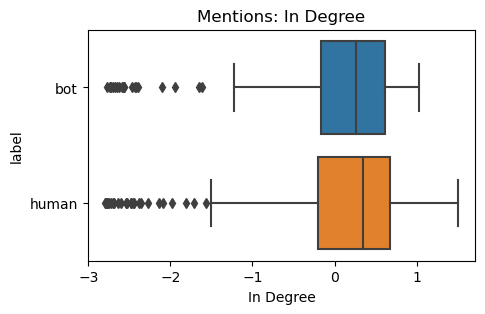

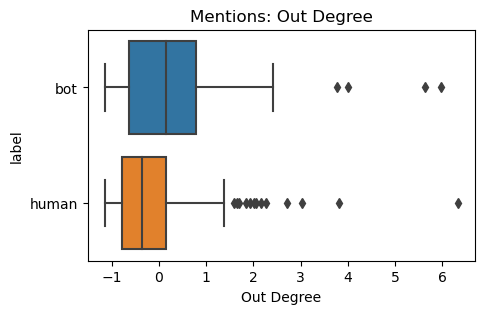

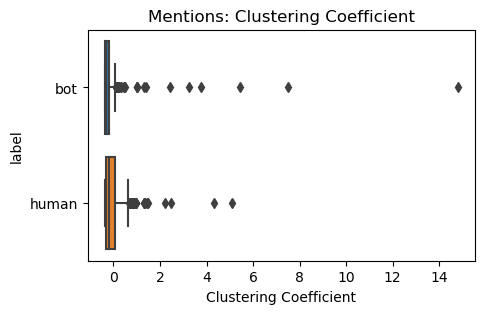

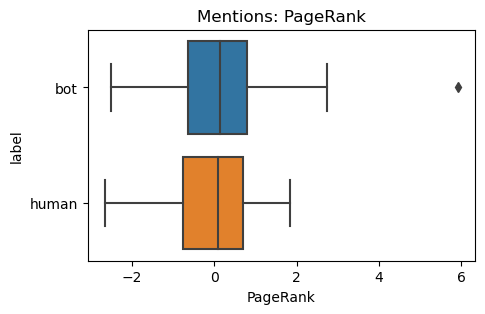

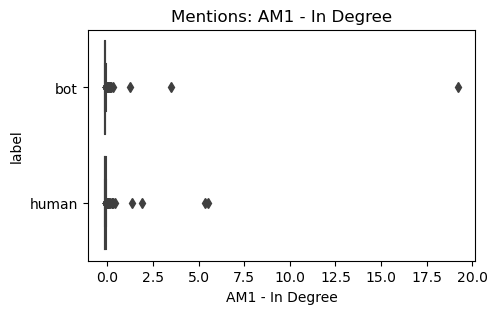

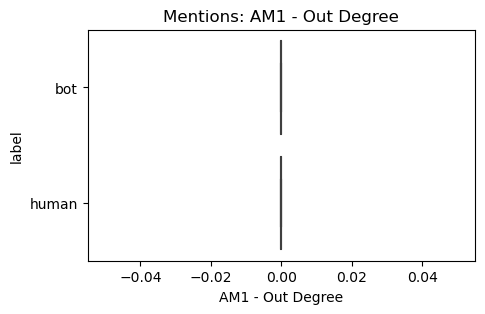

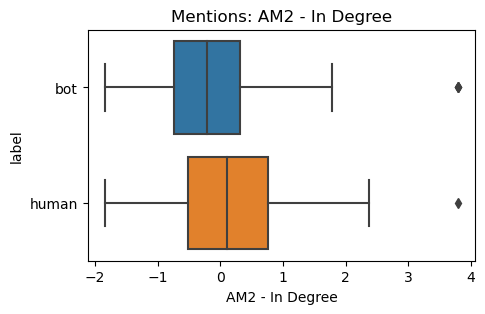

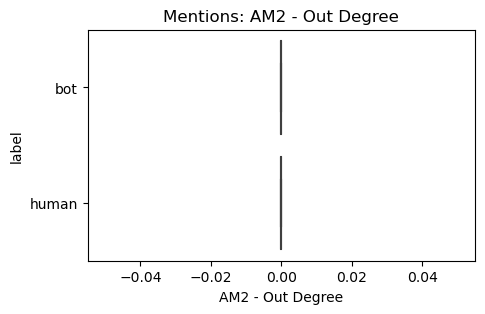

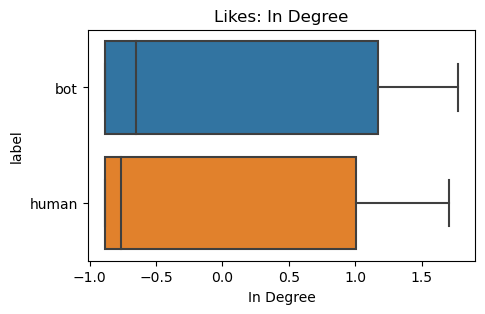

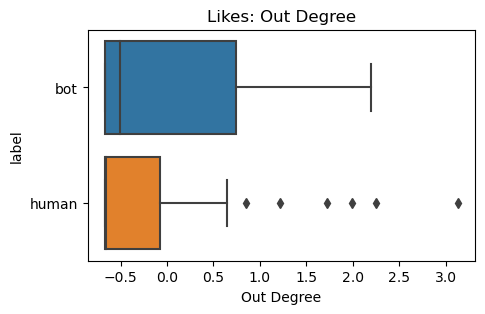

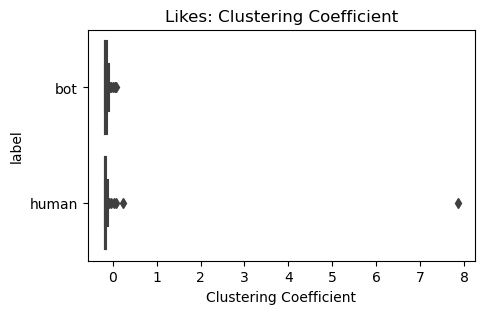

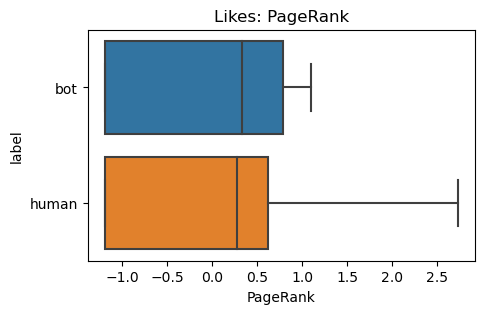

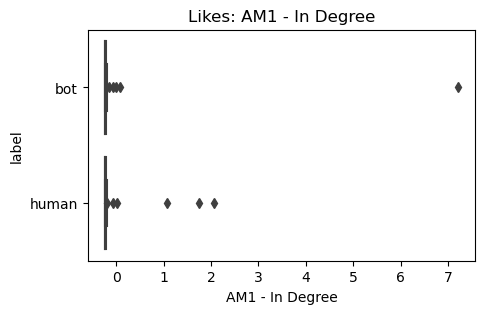

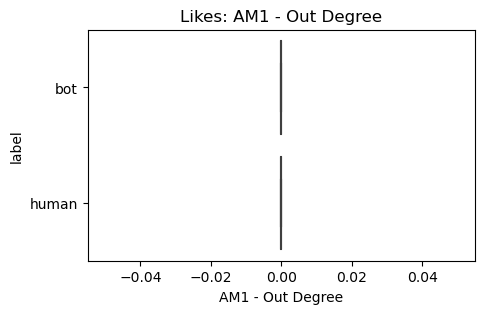

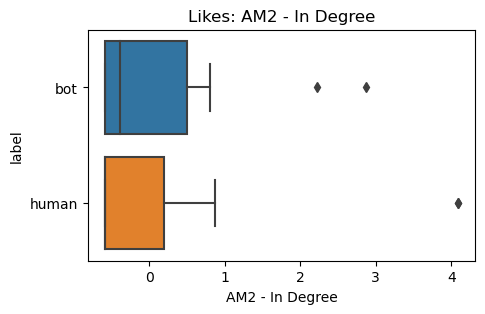

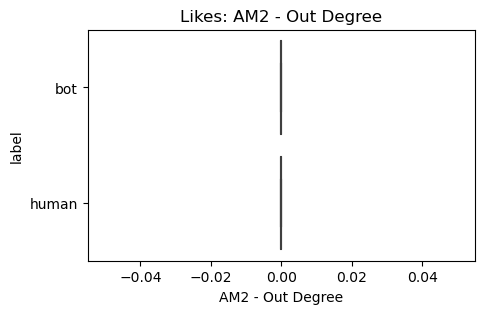

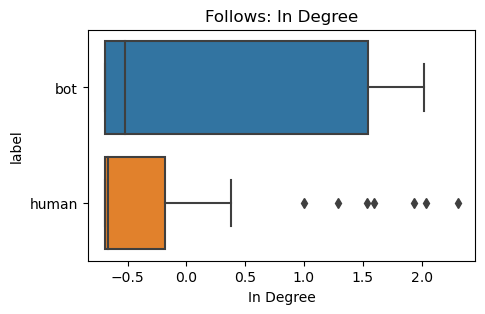

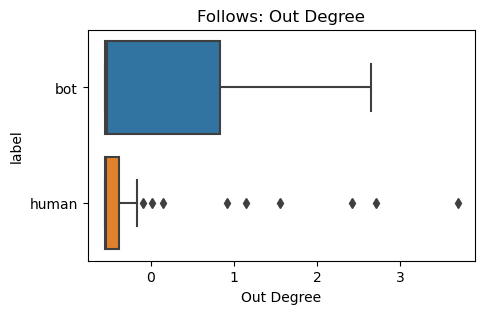

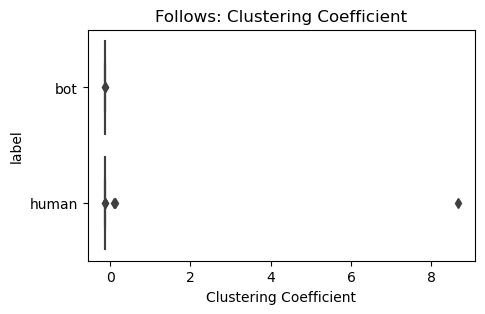

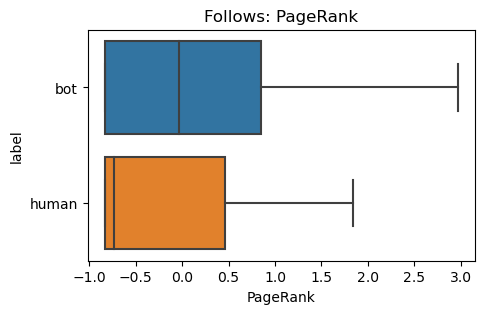

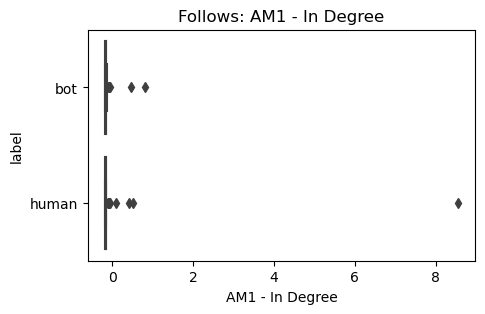

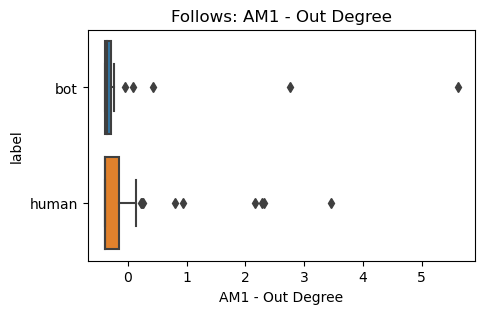

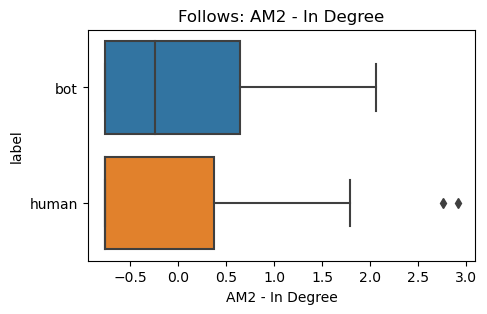

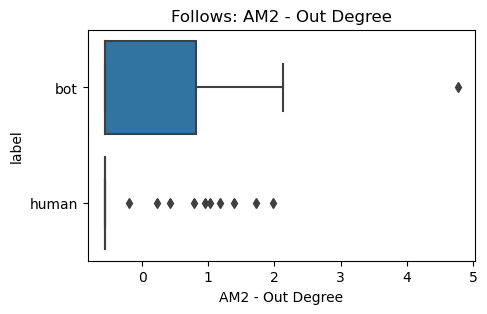

In [194]:
from scipy import stats

for net, d in zip(networks, n):
    print(net)
    for metric, name in zip(metrics,plt_metrics):
        X = d[['indeg', 'outdeg', 'clustercoeff', 'pagerank', 'indeg_A1',
       'outdeg_A1', 'indeg_A2', 'outdeg_A2']]

        scaler = StandardScaler()
        scaler.fit(X)
        #print(scaler.mean_)

        X = pd.DataFrame(scaler.transform(X))
        X.columns = m.columns[1:-1]
        X['label'] = d['label'].reset_index(drop=True)
        
        plt.figure(figsize=(5, 3))
        sns.boxplot(x=X[metric], y=X['label'])
        plt.xlabel(name)
        plt.title(net.capitalize() + ': ' + name)
        
        print(net)
        print(metric)
        print('bot---')
        print(X.loc[X.label == 'bot', metric].mean())
        print(X.loc[X.label == 'bot', metric].std())
        print('human---')
        print(X.loc[X.label == 'human', metric].mean())
        print(X.loc[X.label == 'human', metric].std())
        
        
        
        t_check=stats.ttest_ind(X.loc[X.label == 'bot', metric], X.loc[X.label == 'human', metric])
        pval = t_check[1]
        print('P-VALUE for difference between means:')
        print(pval)
        
        print()

Highest p-values for significance testing:
- Indegree A2 for mentions 
    bot---
    -0.1775509740708118
    0.9851458392843124
    human---
    0.1304316771058662
    0.9944989191503166
    P-VALUE for difference between means:
    0.0011881572692493947
    
 follows
indeg
bot---
0.22315258103419128
1.1310188612889884
human---
-0.17125663195647237
0.8750651596909854
P-VALUE for difference between means:
0.09057563885090726


follows
outdeg_A2
bot---
0.2703314525149441
1.2540141996966783
human---
-0.20746367286030615
0.7140756216544821
P-VALUE for difference between means:
0.03942375194327728